In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mt

In [2]:

from matplotlib import rc

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [3]:
df_Seoul = pd.read_csv('서울시 체력단련장업 인허가 정보 (1).csv', encoding='cp949')


print(df_Seoul.to_string()) 

      개방자치단체코드                  관리번호     인허가일자     인허가취소일자  영업상태코드           영업상태명  상세영업상태코드 상세영업상태명        폐업일자      휴업시작일자      휴업종료일자  재개업일자                 전화번호  소재지면적   소재지우편번호                                                         지번주소                                                          도로명주소   도로명우편번호                                        사업장명        최종수정일자 데이터갱신구분           데이터갱신일자  업태구분명      좌표정보(X)      좌표정보(Y) 문화체육업종명 공사립구분명 보험가입여부코드  지도자수  건축물동수      건축물연면적  회원모집총인원  세부업종명  법인명
0      3030000  CDFH3301061993000002  19930701         NaN       3              폐업         3      폐업  20040417.0         NaN         NaN    NaN                  NaN    NaN  133880.0                                       서울특별시 성동구 홍익동 162-1번지                                                             NaN       NaN                                      신화헬스클럽  2.010000e+13       I   2018.8.31 23:59    NaN          NaN          NaN  체력단련장업     사립        0   NaN    NaN         NaN      NaN    NaN

In [15]:
df_Seoul['인허가일자'] = pd.to_datetime(df_Seoul['인허가일자'], format='%Y%m%d') 
df_Seoul['인허가취소일자'] = pd.to_datetime(df_Seoul['인허가취소일자'], format='%Y%m%d') 
df_Seoul['폐업일자'] = pd.to_datetime(df_Seoul['폐업일자'], format='%Y%m%d') 
df_Seoul['휴업시작일자'] = pd.to_datetime(df_Seoul['휴업시작일자'], format='%Y%m%d') 
df_Seoul['휴업종료일자'] = pd.to_datetime(df_Seoul['휴업종료일자'], format='%Y%m%d') 

print(df_Seoul.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5451 entries, 0 to 5450
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   개방자치단체코드  5451 non-null   int64         
 1   관리번호      5451 non-null   object        
 2   인허가일자     5451 non-null   datetime64[ns]
 3   인허가취소일자   4 non-null      datetime64[ns]
 4   영업상태코드    5451 non-null   int64         
 5   영업상태명     5451 non-null   object        
 6   상세영업상태코드  5451 non-null   int64         
 7   상세영업상태명   5451 non-null   object        
 8   폐업일자      2141 non-null   datetime64[ns]
 9   휴업시작일자    5 non-null      datetime64[ns]
 10  휴업종료일자    5 non-null      datetime64[ns]
 11  재개업일자     0 non-null      float64       
 12  전화번호      3243 non-null   object        
 13  소재지면적     0 non-null      float64       
 14  소재지우편번호   2595 non-null   float64       
 15  지번주소      5379 non-null   object        
 16  도로명주소     5225 non-null   object        
 17  도로명우편번호   3801

In [23]:
Seoul = df_Seoul[['사업장명', '인허가일자', '인허가취소일자', '폐업일자', '상세영업상태코드','상세영업상태명', '도로명주소', '지번주소']]
Seoul.to_csv("서울헬스장현황_가공.csv", mode = 'w', encoding = 'cp949')

In [22]:
df_GG = pd.read_csv('체력단련장업체현황.csv', encoding='cp949')
print(df_GG.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4959 entries, 0 to 4958
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시군명        4959 non-null   object 
 1   사업장명       4959 non-null   object 
 2   인허가일자      4959 non-null   int64  
 3   인허가취소일자    4 non-null      float64
 4   영업상태구분코드   4959 non-null   int64  
 5   영업상태명      4959 non-null   object 
 6   폐업일자       1775 non-null   float64
 7   소재지시설전화번호  2899 non-null   object 
 8   소재지면적정보    0 non-null      float64
 9   도로명우편번호    3708 non-null   float64
 10  소재지도로명주소   4845 non-null   object 
 11  소재지지번주소    4959 non-null   object 
 12  소재지우편번호    4954 non-null   float64
 13  WGS84위도    4946 non-null   float64
 14  WGS84경도    4946 non-null   float64
 15  업태구분명정보    0 non-null      float64
 16  X좌표값       4685 non-null   float64
 17  Y좌표값       4685 non-null   float64
 18  문화체육업종명    4959 non-null   object 
 19  공사립구분명     4959 non-null   object 
 20  보험가입여부코드

In [35]:
df_GG['인허가일자'] = pd.to_datetime(df_GG['인허가일자'], errors = 'coerce', format='%Y%m%d') 
df_GG['인허가취소일자'] = pd.to_datetime(df_GG['인허가취소일자'], errors = 'coerce', format='%Y%m%d') 
df_GG['폐업일자'] = pd.to_datetime(df_GG['폐업일자'], errors = 'coerce', format='%Y%m%d') 
df_GG.rename(columns={'영업상태구분코드':'상세영업상태코드'}, inplace = True) 
df_GG.rename(columns={'영업상태명':'상세영업상태명'}, inplace = True)
df_GG.rename(columns={'소재지도로명주소':'도로명주소'}, inplace = True)
df_GG.rename(columns={'소재지지번주소':'지번주소'}, inplace = True)
print(df_GG.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4959 entries, 0 to 4958
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   시군명        4959 non-null   object        
 1   사업장명       4959 non-null   object        
 2   인허가일자      4958 non-null   datetime64[ns]
 3   인허가취소일자    4 non-null      datetime64[ns]
 4   상세영업상태코드   4959 non-null   int64         
 5   상세영업상태명    4959 non-null   object        
 6   폐업일자       1775 non-null   datetime64[ns]
 7   소재지시설전화번호  2899 non-null   object        
 8   소재지면적정보    0 non-null      float64       
 9   도로명우편번호    3708 non-null   float64       
 10  도로명주소      4845 non-null   object        
 11  지번주소       4959 non-null   object        
 12  소재지우편번호    4954 non-null   float64       
 13  WGS84위도    4946 non-null   float64       
 14  WGS84경도    4946 non-null   float64       
 15  업태구분명정보    0 non-null      float64       
 16  X좌표값       4685 non-null   float64       


In [37]:
Gyeonggi = df_GG[['사업장명', '인허가일자', '인허가취소일자', '폐업일자', '상세영업상태코드','상세영업상태명', '도로명주소', '지번주소']]
Gyeonggi.to_csv("경기헬스장현황_가공.csv", mode = 'w', encoding = 'cp949')

In [38]:
df1 = pd.read_csv('서울헬스장현황_가공.csv', encoding='cp949')
df2 = pd.read_csv('경기헬스장현황_가공.csv', encoding='cp949')

In [39]:
df1

,Unnamed: 0,사업장명,인허가일자,인허가취소일자,폐업일자,상세영업상태코드,상세영업상태명,도로명주소,지번주소
0,0,신화헬스클럽,1993-07-01,NaN,2004-04-17,3,폐업,NaN,서울특별시 성동구 홍익동 162-1번지
1,1,성수헬스,1994-01-27,NaN,2001-11-06,3,폐업,서울특별시 성동구 아차산로7길 14-1 (성수동2가),서울특별시 성동구 성수동2가 289-243번지
2,2,유통헬스,2004-07-29,NaN,2022-04-21,3,폐업,서울특별시 영등포구 영등포로 109 (당산동2가 영등포유통상가),서울특별시 영등포구 당산동2가 30-2
3,3,J-PT,2022-05-16,NaN,NaN,13,영업중,서울특별시 중랑구 공릉로 18 3층 (묵동),서울특별시 중랑구 묵동 174-29
4,4,메이크유 필라테스&PT,2020-01-31,NaN,NaN,13,영업중,서울특별시 구로구 경인로 397 골든타워빌딩 4층 (고척동),서울특별시 구로구 고척동 76-160 골든타워빌딩 4층
...,...,...,...,...,...,...,...,...,...
5446,5446,스타트짐,2022-10-20,NaN,NaN,13,영업중,서울특별시 강서구 양천로59길 46 대일빌딩 4층 (가양동),서울특별시 강서구 가양동 1488-8 대일빌딩
5447,5447,크로스핏 쿠타짐 영등포,2022-10-20,NaN,NaN,13,영업중,서울특별시 영등포구 선유동2로 9 케이타워 지하1층 (양평동3가),서울특별시 영등포구 양평동3가 77-53 케이타워 지하1층
5448,5448,크로스핏 긱스,2022-10-20,NaN,NaN,13,영업중,서울특별시 영등포구 양평로12가길 4 지하1층 (당산동6가),서울특별시 영등포구 당산동6가 347-6 지하1층
5449,5449,짐구석,2019-06-25,NaN,NaN,13,영업중,서울특별시 송파구 위례광장로 200 에스비트램스퀘어 10층 (장지동),서울특별시 송파구 장지동 881-5 에스비트램스퀘어


In [40]:
df2

,Unnamed: 0,사업장명,인허가일자,인허가취소일자,폐업일자,상세영업상태코드,상세영업상태명,도로명주소,지번주소
0,0,시골근육,2020-07-24,NaN,NaN,13,영업중,경기도 가평군 설악면 한서로 206,경기도 가평군 설악면 위곡리 783-3
1,1,멋GYM휘트니스센터,2017-05-10,NaN,NaN,13,영업중,경기도 가평군 조종면 현창로 25,경기도 가평군 조종면 현리 410-18
2,2,BBMC헬스클럽,2017-01-13,NaN,NaN,13,영업중,경기도 가평군 가평읍 석봉로 209 (준수대중목욕탕),경기도 가평군 가평읍 읍내리 637-6번지
3,3,Y휘트니스,2017-11-16,NaN,NaN,13,영업중,경기도 가평군 설악면 신천중앙로 130,경기도 가평군 설악면 신천리 450-1
4,4,스페이스 헬스클럽,2004-02-09,NaN,NaN,13,영업중,경기도 가평군 청평면 경춘로 807-11,경기도 가평군 청평면 청평리 445-3
...,...,...,...,...,...,...,...,...,...
4954,4954,별장스포츠센터,2000-01-28,NaN,2015-09-23,3,폐업,경기도 화성시 장안면 흥천길 84-34,경기도 화성시 장안면 사곡리 736-4
4955,4955,Dr.K Muscle&Beauty,2010-07-28,NaN,2020-08-24,3,폐업,경기도 화성시 동탄공원로2길 33-9 (반송동),경기도 화성시 반송동 50-8
4956,4956,퍼펙트바디,2012-06-04,NaN,2013-06-03,3,폐업,"경기도 화성시 동탄반석로 156, 108호 (반송동)",경기도 화성시 반송동 93-9 하이페리온 108호
4957,4957,바디앤소울스포츠,2011-02-08,NaN,2016-02-18,3,폐업,"경기도 화성시 동탄중앙로 220, 401호 (반송동,메타폴리스 상가동)",경기도 화성시 반송동 96 메타폴리스 상가동 401호


In [41]:
df_Sudogwon = pd.DataFrame()
for file in ['경기헬스장현황_가공.csv', '서울헬스장현황_가공.csv']:
    df = pd.read_csv(file, encoding='cp949')
    df_Sudogwon = pd.concat([df_Sudogwon, df])


In [42]:
df_Sudogwon

,Unnamed: 0,사업장명,인허가일자,인허가취소일자,폐업일자,상세영업상태코드,상세영업상태명,도로명주소,지번주소
0,0,시골근육,2020-07-24,NaN,NaN,13,영업중,경기도 가평군 설악면 한서로 206,경기도 가평군 설악면 위곡리 783-3
1,1,멋GYM휘트니스센터,2017-05-10,NaN,NaN,13,영업중,경기도 가평군 조종면 현창로 25,경기도 가평군 조종면 현리 410-18
2,2,BBMC헬스클럽,2017-01-13,NaN,NaN,13,영업중,경기도 가평군 가평읍 석봉로 209 (준수대중목욕탕),경기도 가평군 가평읍 읍내리 637-6번지
3,3,Y휘트니스,2017-11-16,NaN,NaN,13,영업중,경기도 가평군 설악면 신천중앙로 130,경기도 가평군 설악면 신천리 450-1
4,4,스페이스 헬스클럽,2004-02-09,NaN,NaN,13,영업중,경기도 가평군 청평면 경춘로 807-11,경기도 가평군 청평면 청평리 445-3
...,...,...,...,...,...,...,...,...,...
5446,5446,스타트짐,2022-10-20,NaN,NaN,13,영업중,서울특별시 강서구 양천로59길 46 대일빌딩 4층 (가양동),서울특별시 강서구 가양동 1488-8 대일빌딩
5447,5447,크로스핏 쿠타짐 영등포,2022-10-20,NaN,NaN,13,영업중,서울특별시 영등포구 선유동2로 9 케이타워 지하1층 (양평동3가),서울특별시 영등포구 양평동3가 77-53 케이타워 지하1층
5448,5448,크로스핏 긱스,2022-10-20,NaN,NaN,13,영업중,서울특별시 영등포구 양평로12가길 4 지하1층 (당산동6가),서울특별시 영등포구 당산동6가 347-6 지하1층
5449,5449,짐구석,2019-06-25,NaN,NaN,13,영업중,서울특별시 송파구 위례광장로 200 에스비트램스퀘어 10층 (장지동),서울특별시 송파구 장지동 881-5 에스비트램스퀘어


In [43]:
df_Sudogwon.to_csv("수도권헬스장현황_가공.csv", mode = 'w', encoding = 'cp949')

# 가공 끝 -> 수도권헬스장현황_가공.csv 활용해서 matplotlib 그래프

<AxesSubplot:title={'center':'연도별 신규 업장 추이'}, xlabel='인허가일자', ylabel='신규 업장 수'>

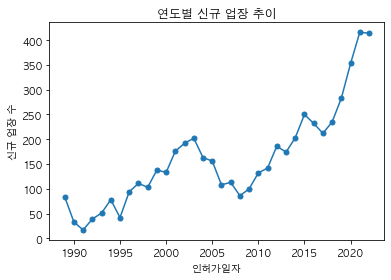

In [6]:
plt.title("연도별 신규 업장 추이")
plt.xlabel("연도")
plt.ylabel("신규 업장 수")
df_Seoul.groupby(df_Seoul['인허가일자'].dt.year)['영업상태명'].count().plot(marker = 'o', ms = 5)

<AxesSubplot:title={'center':'연도별 폐업장 추이'}, xlabel='폐업일자', ylabel='폐업장 수'>

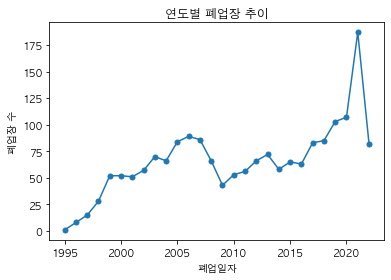

In [29]:
plt.title("연도별 폐업장 추이")
plt.ylabel("폐업장 수")

df_Seoul[df_Seoul['영업상태명'] == '폐업'].groupby(df_Seoul['폐업일자'].dt.year)['폐업일자'].count().plot(marker = 'o', ms = 5)

<AxesSubplot:title={'center':'연도별 신규 업장 추이'}, xlabel='인허가일자', ylabel='신규 업장 수'>

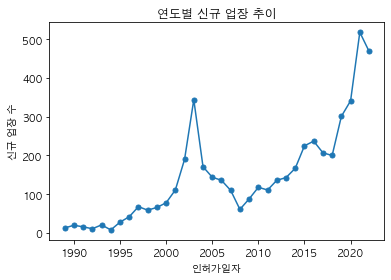

In [21]:
plt.title("연도별 신규 업장 추이")
plt.xlabel("연도")
plt.ylabel("신규 업장 수")
df_GG.groupby(df_GG['인허가일자'].dt.year)['영업상태명'].count().plot(marker = 'o', ms = 5)

<AxesSubplot:title={'center':'연도별 폐업장 추이'}, xlabel='폐업일자', ylabel='폐업장 수'>

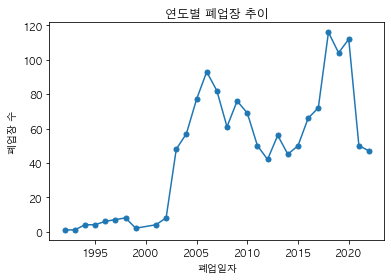

In [30]:
plt.title("연도별 폐업장 추이")
plt.ylabel("폐업장 수")

df_GG[df_GG['영업상태명'] == '폐업'].groupby(df_GG['폐업일자'].dt.year)['폐업일자'].count().plot(marker = 'o', ms = 5)